
<a href="https://colab.research.google.com/github/kokchun/Python-course-AI22/blob/main/Lectures/Lec12-polymorphism.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code

---
# Lecture notes - OOP polymorphism

---
This is the lecture note for **OOP polymorphism** - but it's built upon contents from previous lectures such as: 
- input-output
- variables
- if-statement
- for loop
- while 
- lists
- random
- strings
- functions
- error handling
- file handling
- dictionary
- OOP

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to polymorphism. I encourage you to read further about polymorphism.

Read more [polymorphism](https://www.programiz.com/python-programming/polymorphism). 

---

## Polymorphism

- same function name or operator used for different types
- e.g. len() on a string, len() on a list
- plus operator + on a string concatenates the string while on an int performs integer addition 

In [15]:
print(f"len(['a','b','c']): {len(['a','b','c'])}")
print(f"len('abc'): {len('abc')}")

len(['a','b','c']): 3
len('abc'): 3


## Polymorphism in class methods

In [10]:
class Fish:
    def __init__(self, name):
        self.name = name

    def __str__(self):
        return f"I am a fish, my name is {self.name}"

    def speak(self):
        print("Blupp blupp")


class Fox:
    def __init__(self, name):
        self.name = name

    def __str__(self):
        return f"I am a fox, my name is {self.name}, no one knows how I sound"

    def speak(self):
        return NotImplemented # as we don't know the sound of the fox 


animals = (Fish("Pelle"), Fox("Ylvis"))

# although animals have different types, you can iterate through it and call same method as they are bound to different objects
for animal in animals:
    print(animal)
    animal.speak()


I am a fish, my name is Pelle
Blupp blupp
I am a fox, my name is Ylvis, no one knows how I sound


---
## Operator overloading

- giving additional functionality to an operator
- e.g. + is overloaded for strings, int, float etc. 
- Read more: [operator overloading](https://www.geeksforgeeks.org/operator-overloading-in-python/)

| Operator |        Dunder method         |
| :------: | :--------------------------: |
|    +     |   \_\_add\_\_(self,other)    |
|    -     |   \_\_sub\_\_(self,other)    |
|    \*    |   \_\_mul\_\_(self,other)    |
|    /     |   \_\_div\_\_(self,other)    |
|    //    | \_\_floordiv\_\_(self,other) |
|    %     |   \_\_mod\_\_(self,other)    |
|   \*\*   |   \_\_pow\_\_(self,other)    |
|    <     |    \_\_lt\_\_(self,other)    |
|    <=    |    \_\_le\_\_(self,other)    |
|    >     |    \_\_gt\_\_(self,other)    |
|    >=    |    \_\_ge\_\_(self,other)    |
|    ==    |    \_\_eq\_\_(self,other)    |

- Note that there are more operators that can be overloaded than those specified in this list

Vector(2.0, 3.0, 51.5, 67.0, 1.0)
len(v1): 5
Both must be Vector and have the same length
Vector(3.0, 4.0)
__mul__ is called
Vector(4.0, 4.0)
__rmul__ is called ...
__mul__ is called


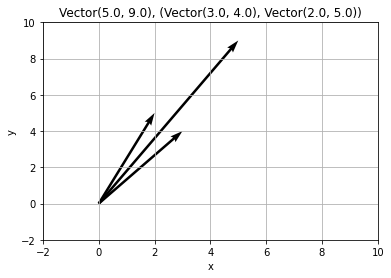

In [103]:
import matplotlib.pyplot as plt

class Vector:
    """ A class to represent a Euclidean vector with magnitude and direction"""

    # in Python >= 3.10 - can use float | int in annotation
    def __init__(self, *numbers: float) -> None:  # *numbers is variadic parameter
        # error checking
        for number in numbers:
            if not isinstance(number, (float, int)):
                raise TypeError(f"{number} is not valid number in a vector")

        if len(numbers) <= 0:
            raise ValueError("Vector can't be empty")

        # to take care of booleans
        self._numbers = tuple(float(number) for number in numbers)

    @property
    def numbers(self) -> tuple:
        return self._numbers

    def __add__(self, other: "Vector") -> "Vector":
        if self.validate_vectors(other):
            numbers = (a+b for a, b in zip(self.numbers, other.numbers))
            return Vector(*numbers)

    def __sub__(self, other: "Vector") -> "Vector":
        if self.validate_vectors(other):
            numbers = (a-b for a, b in zip(self.numbers, other.numbers))
            return Vector(*numbers)

    def __mul__(self, value: float) -> "Vector":
        print("__mul__ is called")
        if not isinstance(value, (int, float)):
            raise TypeError(
                f"The value for multiplication must be int or float not {type(value)}")
        numbers = (value*a for a in self.numbers)
        return Vector(*numbers)

    # to make multiplication commutative, i.e. a*v = v*a
    def __rmul__(self, value: float) -> "Vector":
        print("__rmul__ is called ...")
        return self*value

    # for using len() method on a Vector object
    def __len__(self) -> int:
        """ Returns number of components in a Vector not the length"""
        return len(self.numbers)

    def norm(self) -> float:
        """ Returns the Euclidean norm of a Vector"""
        return sum(a**2 for a in self.numbers)**.5

    def validate_vectors(self, other: "Vector") -> bool:
        """ validates if two vectors have same length """
        if not isinstance(other, Vector) or len(other) != len(self):
            raise TypeError(f"Both must be Vector and have the same length")
        return len(self) == len(other)

    def __getitem__(self, item: int) -> float:
        return self.numbers[item]

    def plot(self, *others: "Vector") -> None:
        """ Visualize vectors """
        X, Y = [], []

        for vector in tuple(others):
            if Vector.is2D(vector) and Vector.is2D(self):
                X.append(vector[0])
                Y.append(vector[1])
        
        X.append(self[0])
        Y.append(self[1])

        originX = originY = tuple(0 for _ in range(len(X)))

        plt.quiver(originX, originY, X, Y, scale=1,
                   scale_units="xy", angles="xy")
        plt.xlim(-2, 10)
        plt.ylim(-2, 10)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title(f"{self}, {others}")
        plt.grid()
        plt.show()

        # TODO: make xlim and ylim adapt after the vectors dimensions 
        # TODO: fix title paranthesis

    @staticmethod # bound to the class and not dependent on the object itself
    def is2D(vector: "Vector") -> bool:
        if len(vector) != 2:
            raise ValueError(
                f"Vector dimension must be 2 not {len(vector)}")
        return True

    def __repr__(self) -> str:
        return f"Vector{self.numbers}"

    # NOTE: There are many more features to be implemented, feel free to do it
    # TODO: implement norm between vectors
    # TODO: implement dot product
    # TODO: implement vector product
    # TODO: implement conjugate 
    # TODO: implement projection

v1 = Vector(2, 3, 51.5, 67, True)
print(v1)
print(f"len(v1): {len(v1)}")

v2 = Vector(1, 2)
try:
    v1+v2
except TypeError as err:
    print(err)

v3 = Vector(2, 2)

v_23 = v3+v2
print(v_23)
v_23.norm()

print(v3*2)
# 2*v3 not work if you haven't implemented __rmul__()
2*v3

a = Vector(3,4)
b = Vector(2,5)
c = a + b 

c.plot(a,b)

## Polymorphism with inheritance

This is covered in the inheritance lecture

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---